# Application: Golf Swing Analysis and Training

Most instruction these days for sports that involve swinging throwing and kicking using video analysis to assess proper and technique and this is true for golf.

The golf swing has been studied extensively using video analysis for over half a century and there is a wealth knowledge regarding the foundamentals of an ideal golf swing based on the collective analysis from thousands of professional golfers in the last several decades.

The key points in the swing the video frames are then manually annotated by the instructor using a mouse to show various relationships regarding body positions, club shaft and various related angles between the two.

These three points are not connected by the skeletal structure defined by the model, but rather this is our specific choice to identify and connect these three points and the reason for that is that this particular triangle is very informative and provides a very good reference for determining proper technique at various positions in the swing.

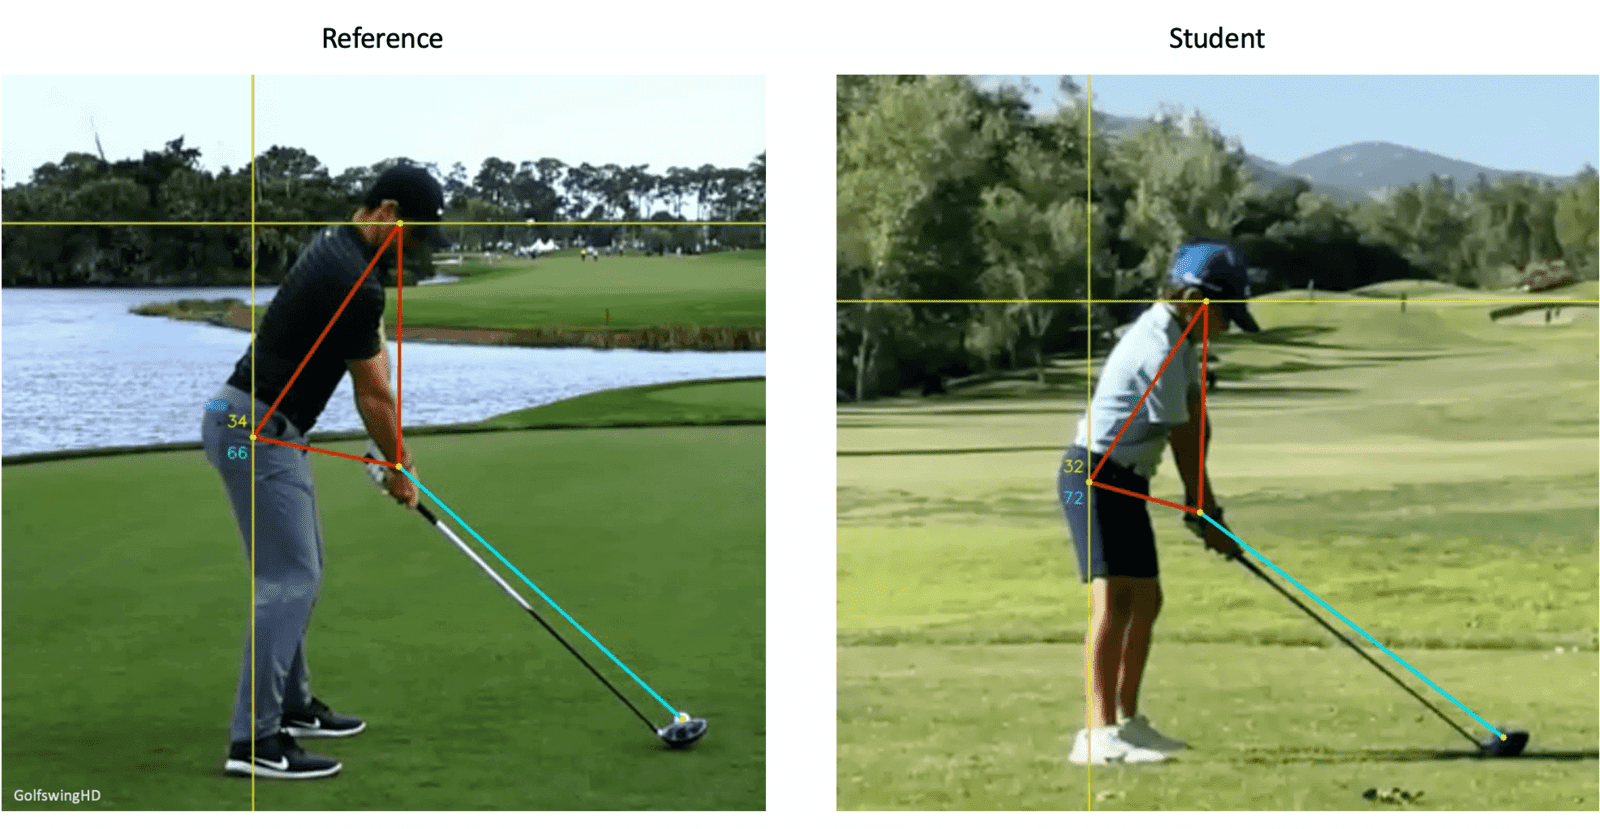

In [1]:
import cv2
import time
import math
import mediapipe as mp
import numpy as np

## 1. Initializations

In [2]:
file_name = "./images/Reference_Swing_DTL.mp4"
video_cap = cv2.VideoCapture(file_name)
if not video_cap.isOpened():
    print(f"Unable to open: {video_cap}")


In [3]:
# Create a video writer object
fps = int(video_cap.get(cv2.CAP_PROP_FPS))
frame_w = int(video_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_h = int(video_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_size = (frame_w, frame_h)

video_out_file = file_name[:-4] + '_out_landmarks.mp4'
video_output = cv2.VideoWriter(video_out_file, cv2.VideoWriter_fourcc(*'mp4v'), fps, frame_size)

## 2. Extract Landmarks Coordinates

In [4]:
# BGR colors
color_light = (255, 255, 0)
color_marks = (0, 255, 255)
color_join = (0, 20, 200)

# In a more advanced application the initial position of
# the golf ball would be automatically detected
ball_pos_x = 650
ball_pos_y = 927

mp_pose = mp.solutions.pose

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while True:
        has_frame, frame = video_cap.read()

        if not has_frame:
            break
        # Convert the BGR image to RGB.
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the image frame.
        keypoints = pose.process(frame)
        landmarks = keypoints.pose_landmarks
        enum_pose = mp_pose.PoseLandmark

        # Convert the image back to BGR.
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        
        if landmarks is not None:
            # Right ear.
            r_ear_x = int(landmarks.landmark[enum_pose.RIGHT_EAR].x * frame_w)
            r_ear_y = int(landmarks.landmark[enum_pose.RIGHT_EAR].y * frame_h)
            r_ear_p = np.array([r_ear_x, r_ear_y])

            # Right wrist.
            r_wrist_x = int(landmarks.landmark[enum_pose.RIGHT_WRIST].x * frame_w)
            r_wrist_y = int(landmarks.landmark[enum_pose.RIGHT_WRIST].y * frame_h)
            r_wrist_p = np.array([r_wrist_x, r_wrist_y])

            # Right hip.
            r_hip_x = int(landmarks.landmark[enum_pose.RIGHT_HIP].x * frame_w)
            r_hip_y = int(landmarks.landmark[enum_pose.RIGHT_HIP].y * frame_h)
            r_hip_p = np.array([r_hip_x, r_hip_y])

            # Join landmarks.
            cv2.line(frame, (r_hip_p[0], r_hip_p[1]), (r_ear_p[0], r_ear_p[1]), color_join, 2, cv2.LINE_AA)
            cv2.line(frame, (r_hip_p[0], r_hip_p[1] ), (r_wrist_p[0], r_wrist_p[1]), color_join, 2, cv2.LINE_AA)
            cv2.line(frame, (r_ear_p[0], r_ear_p[1]), (r_wrist_p[0], r_wrist_p[1]), color_join, 2, cv2.LINE_AA)
            cv2.line(frame, (ball_pos_x, ball_pos_y), (r_wrist_p[0], r_wrist_p[1]), color_light, 2, cv2.LINE_AA)

            # Draw landmarks.
            cv2.circle(frame, (r_ear_p[0], r_ear_p[1]), 3, color_marks, -1)
            cv2.circle(frame, (r_wrist_p[0], r_wrist_p[1]), 3, color_marks, -1)
            cv2.circle(frame, (r_hip_p[0], r_hip_p[1] ), 3, color_marks, -1)
            cv2.circle(frame, (ball_pos_x, ball_pos_y), 3, color_marks, -1)

            video_output.write(frame)

video_cap.release()
video_output.release()

## 3. Defining Vectors Between Landmark Points

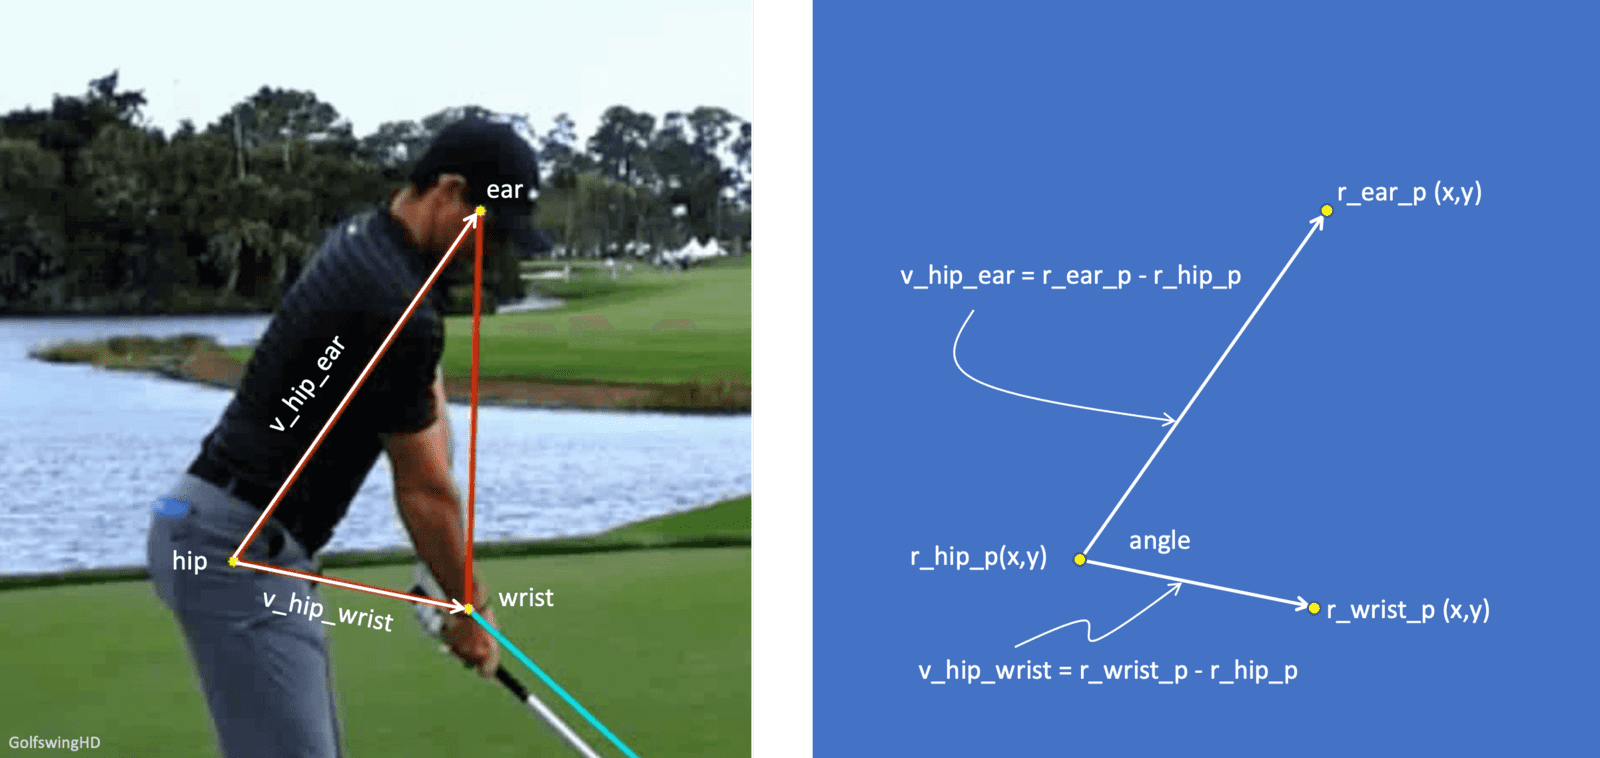

## 5. Function to Compute the Angle Between Two Vectors

The dot product between two vectors is defined as follows:

\begin{align}
{a\bullet b} = {|a||b|}\bullet \cos(\theta)
\end{align}

We can therefore compute the angle between the two vectors re-arranging the above equation.


\begin{align}
\theta = \arccos (\frac{a\bullet b}{|a||b|})
\end{align}

In [5]:
# Compute the angle between any two vectors
def compute_angle(v1, v2):

    # Unit vector.
    v1u = v1 / np.linalg.norm(v1)
    # Unit vector.
    v2u = v2 / np.linalg.norm(v2)
    # Compute the angle between the two unit vectors.
    angle_deg = np.arccos(np.dot(v1u, v2u)) * 180 / math.pi

    return angle_deg

## 4. Initializations

In [7]:
# Create video capture object
run_modes = ['reference', 'student', 'student2']

mode = run_modes[0]

if mode == 'reference':
    file_name = './images/Reference_Swing_DTL.mp4'
elif mode == 'student':
    file_name = './images/Student_Swing_DTL.mp4'
elif mode == 'student2':
    file_name = './images/Student_Swing_DTL_wide_impact_2months_later.mp4'

video_cap = cv2.VideoCapture(file_name)

if not video_cap.isOpened():
    print('Unable to open: ' + file_name)

In [8]:
# Create video writer object
fps = int(video_cap.get(cv2.CAP_PROP_FPS))
frame_w = int(video_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_h = int(video_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_size = (frame_w, frame_h)

video_out_file = file_name[:-4] + '_out_analysis.mp4'

video_output = cv2.VideoWriter(video_out_file, cv2.VideoWriter_fourcc(*'mp4v'), fps, frame_size)

## 5. Convenience Function to Extract Lansmark Coordinates

In [9]:
def get_landmark_point(landmarks, landmark_point, w, h):
    x = int(landmarks.landmark[landmark_point].x * w)
    y = int(landmarks.landmark[landmark_point].y * h)
    point = np.array([x, y])
    return point

## 6. Golf Swing Analysis Implementation

In [10]:
color_light  = (255, 255, 0)
color_marks  = (0, 255, 255)
color_yellow = (0, 255, 255)
color_gray   = (127, 127, 127)
color_join   = (0, 20, 200)

first_frame = True

# In a more advanced application the initial position of
# the golf ball would be automatically detected.
if mode == 'reference':
    # for: Reference_Swing_DTL.mp4
    ball_pos_x = 650
    ball_pos_y = 927
elif mode == 'student':
    # for: Student_Swing_DTL.mp4
    ball_pos_x = 640
    ball_pos_y = 944
elif mode == 'student2':
    # for: Student_Swing_DTL_wide_2months_later.mp4
    ball_pos_x = 783
    ball_pos_y = 613

mp_pose = mp.solutions.pose

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while True:
        has_frame, frame = video_cap.read()
        if not has_frame:
            break

        # Convert the BGR to RGB.
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Porcess the image.
        keypoints = pose.process(frame)

        # Convert the image back to RGB.
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

        # Use the following assignments to abbreviate the notation further below.
        landmarks = keypoints.pose_landmarks
        enum_pose = mp_pose.PoseLandmark

        if landmarks is not None:
            # Acquire the landmark coordinates.
            r_ear_p = get_landmark_point(landmarks, enum_pose.RIGHT_EAR, frame_w, frame_h)
            r_wrist_p = get_landmark_point(landmarks, enum_pose.RIGHT_WRIST, frame_w, frame_h)
            r_hip_p = get_landmark_point(landmarks, enum_pose.RIGHT_HIP, frame_w, frame_h)

            # Compute the angle between ear-hip-wrist
            v_hip_hear = np.subtract(r_ear_p, r_hip_p)
            v_hip_wrist = np.subtract(r_wrist_p, r_hip_p)
            angle_ear_hip_wrist = compute_angle(v_hip_hear, v_hip_wrist)
            text_loc = (r_hip_p[0] - 25, r_hip_p[1] + 20)
            cv2.putText(frame, str(int(angle_ear_hip_wrist)), text_loc, cv2.FONT_HERSHEY_SIMPLEX, .5,
            color_light, 1, cv2.LINE_AA)

            # Compute the angle between ear-hip-vertical
            v_hip_ear = np.subtract(r_ear_p, r_hip_p)
            vert_p = np.array([r_hip_p[0], r_hip_p[1] - 1])
            v_hip_vert = np.subtract(vert_p, r_hip_p)
            angle_ear_hip_vert = compute_angle(v_hip_ear, v_hip_vert)
            text_loc = (r_hip_p[0] - 25, r_hip_p[1]  - 10)
            cv2.putText(frame, str(int(angle_ear_hip_vert)), text_loc, cv2.FONT_HERSHEY_SIMPLEX, .5,
                        color_yellow, 1, cv2.LINE_AA)

            # Join landmarks.
            cv2.line(frame, (r_hip_p[0], r_hip_p[1] ), (r_ear_p[0], r_ear_p[1]), color_join, 2, cv2.LINE_AA)
            cv2.line(frame, (r_hip_p[0], r_hip_p[1] ), (r_wrist_p[0], r_wrist_p[1]), color_join, 2, cv2.LINE_AA)
            cv2.line(frame, (r_ear_p[0], r_ear_p[1]), (r_wrist_p[0], r_wrist_p[1]), color_join, 2, cv2.LINE_AA)
            cv2.line(frame, (ball_pos_x, ball_pos_y), (r_wrist_p[0], r_wrist_p[1]), color_light, 2, cv2.LINE_AA)

            # Draw landmarks.
            cv2.circle(frame, (r_ear_p[0], r_ear_p[1]), 3, color_marks, -1)
            cv2.circle(frame, (r_wrist_p[0], r_wrist_p[1]), 3, color_marks, -1)
            cv2.circle(frame, (r_hip_p[0], r_hip_p[1] ), 3, color_marks, -1)
            cv2.circle(frame, (ball_pos_x, ball_pos_y), 3, color_marks, -1)

            if first_frame:
                r_hip_x_0 = r_hip_p[0]
                r_ear_y_0 = r_ear_p[1]
                first_frame = False

            # Draw initial vertical and horizontal lines through right hip and right ear.
            cv2.line(frame, (r_hip_x_0, frame_h), (r_hip_x_0, 0), color_gray, 1, cv2.LINE_AA)
            cv2.line(frame, (0, r_ear_y_0), (frame_w, r_ear_y_0), color_gray, 1, cv2.LINE_AA)

            # Draw dynamic vertical and horizontal lines through right hip and right ear.
            cv2.line(frame, (r_hip_p[0], frame_h), (r_hip_p[0], 0), color_yellow, 1, cv2.LINE_AA)
            cv2.line(frame, (0, r_ear_p[1]), (frame_w, r_ear_p[1]), color_yellow, 1, cv2.LINE_AA)

            video_output.write(frame)

video_cap.release()
video_output.release()

## 7. Analysis of Results

The code above was executed twice. Once for the reference swing video and once for the student swing video. In the sections below we will compare two at key points points during the golf swing starting at the address position.

### 7.1 Comparison at Address

The positon of the student at "address" is very good. The angle of the spine, and the relative positon of the hands, head, and hips are all in the proper position. Also notice that there is only a slight bending at the knees.

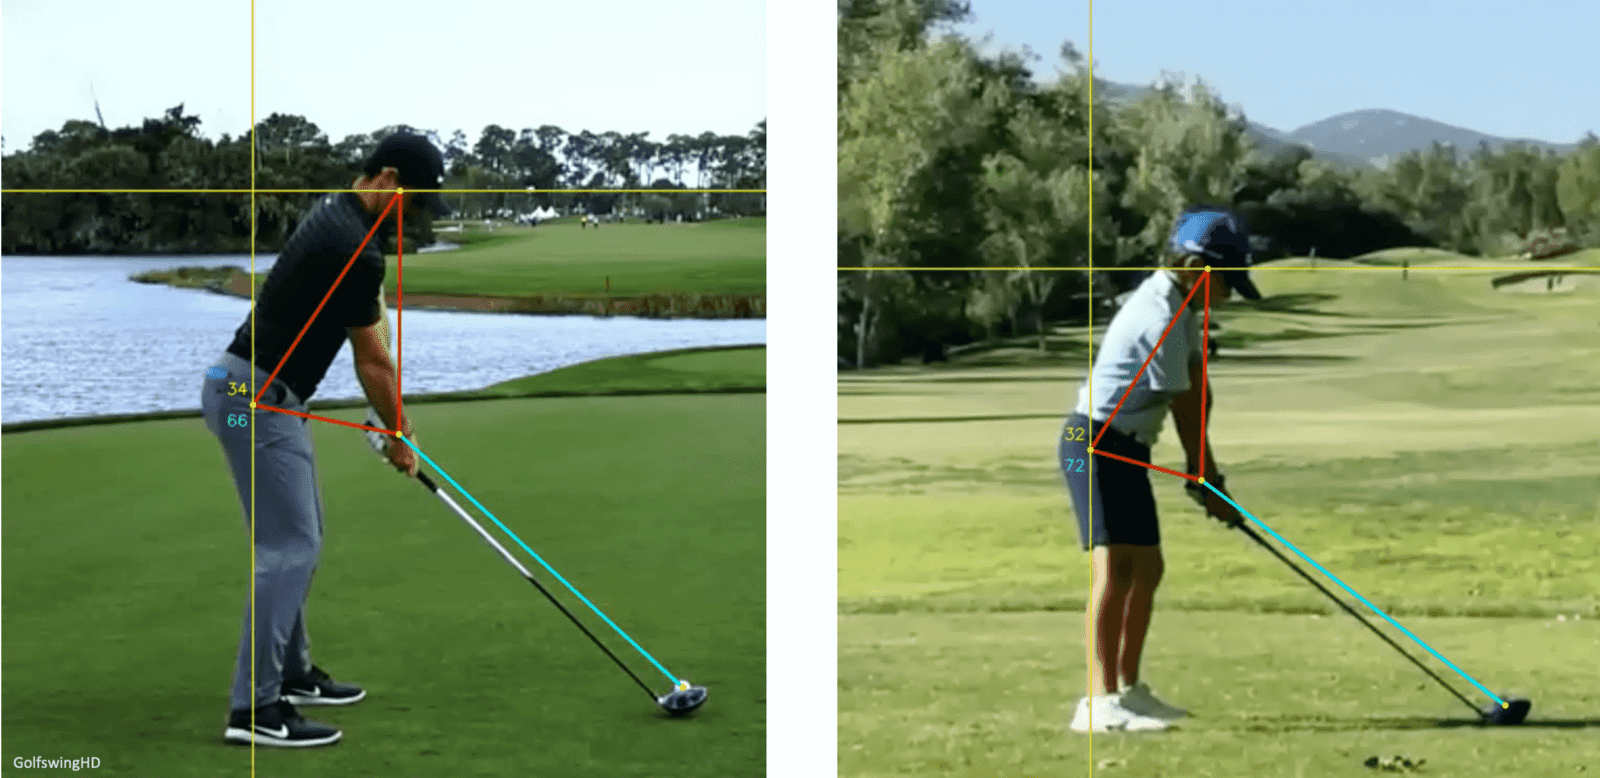

### 7.2 Comparison at the Top of the Backswing

There are several things to note about the student's form at the top of the backswing. The angle of the spine should be roughly perpendicular to the swing plane (identified in light blue). In this case, the student's spine is too vertical at the top of the backswing which causes him to be out of position. Also, notice that the student's head has shifted vertically up during the backswing (the horizontal yellow line is now substantially higher than it was as address).

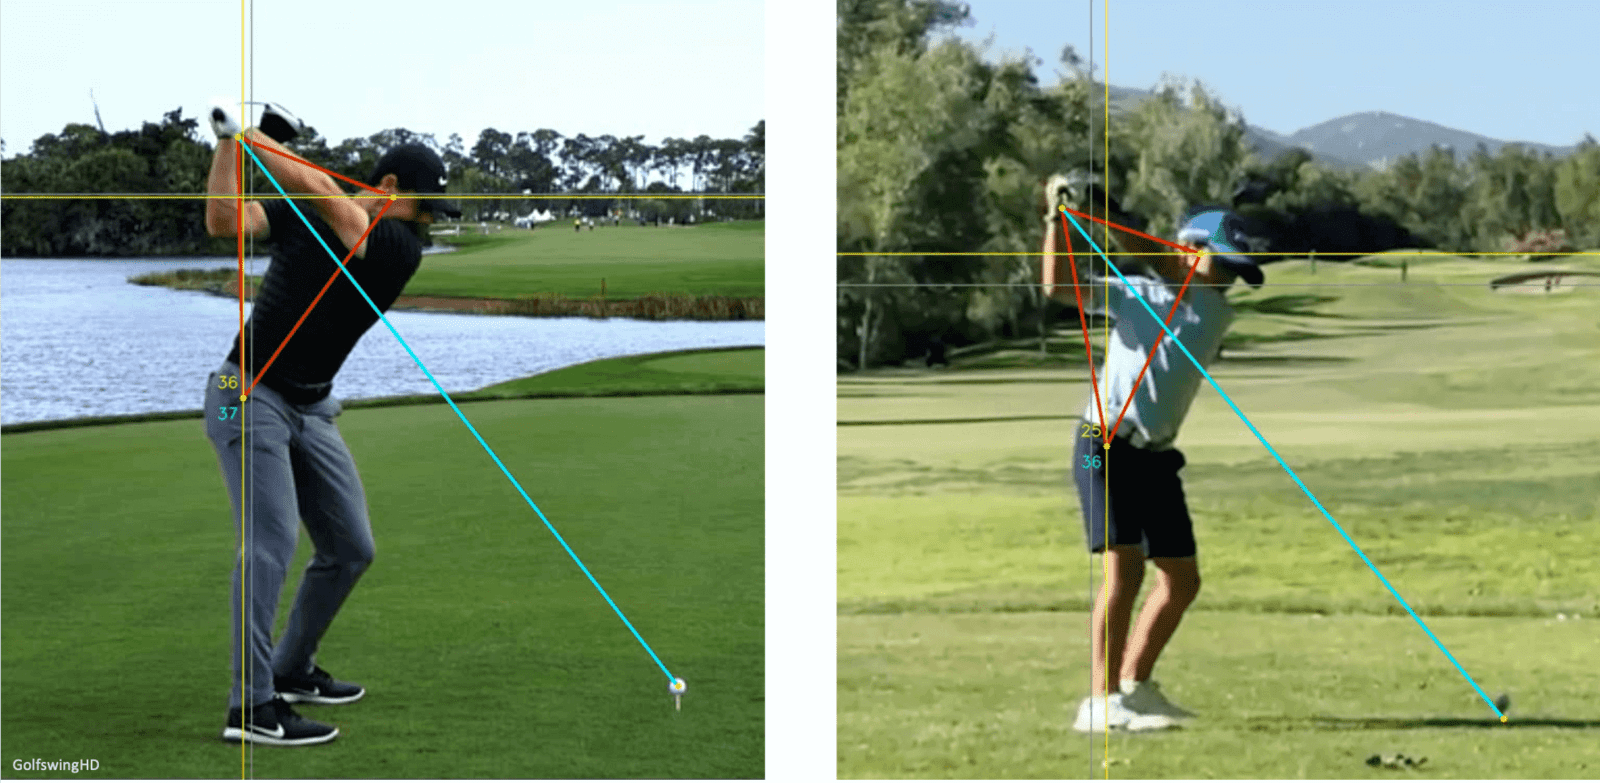

### 7.3 Comparison During the Downswing

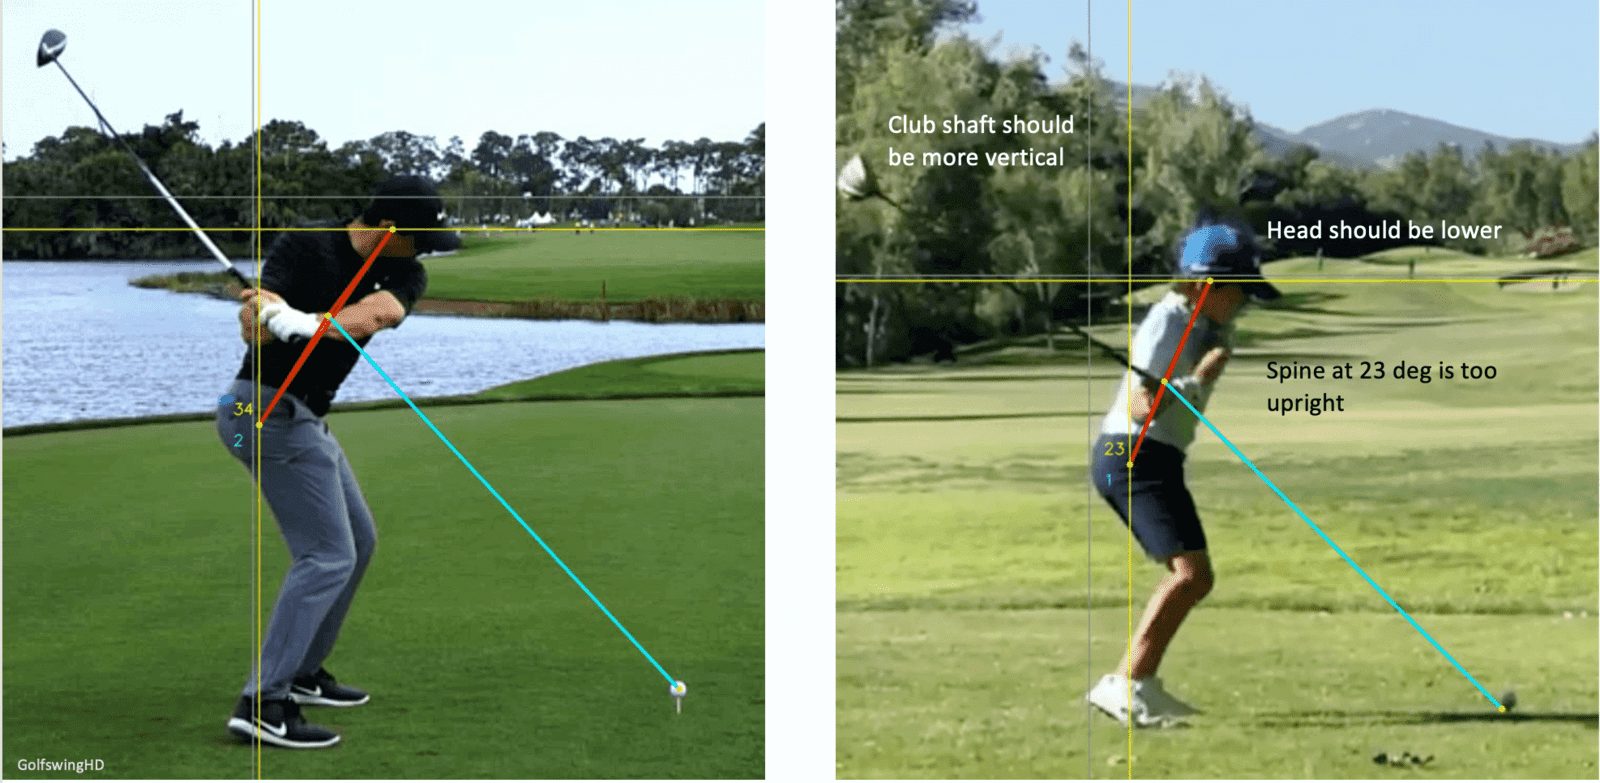

### 7.4 Comparison at Impact

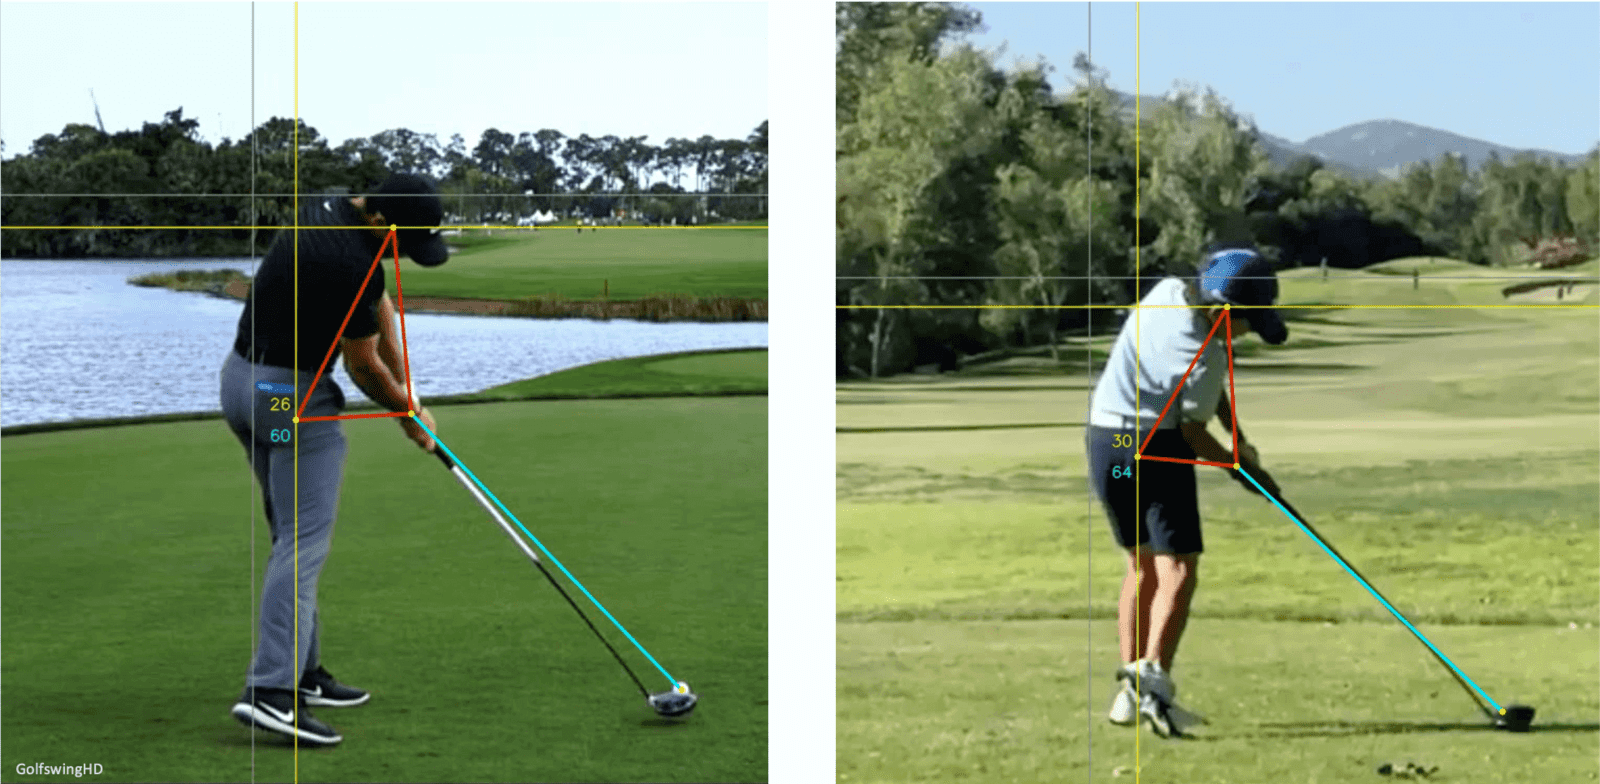

---

## 8. Training Improvement (Two Months Later)
### 8.1 Comparison  During the Downswing

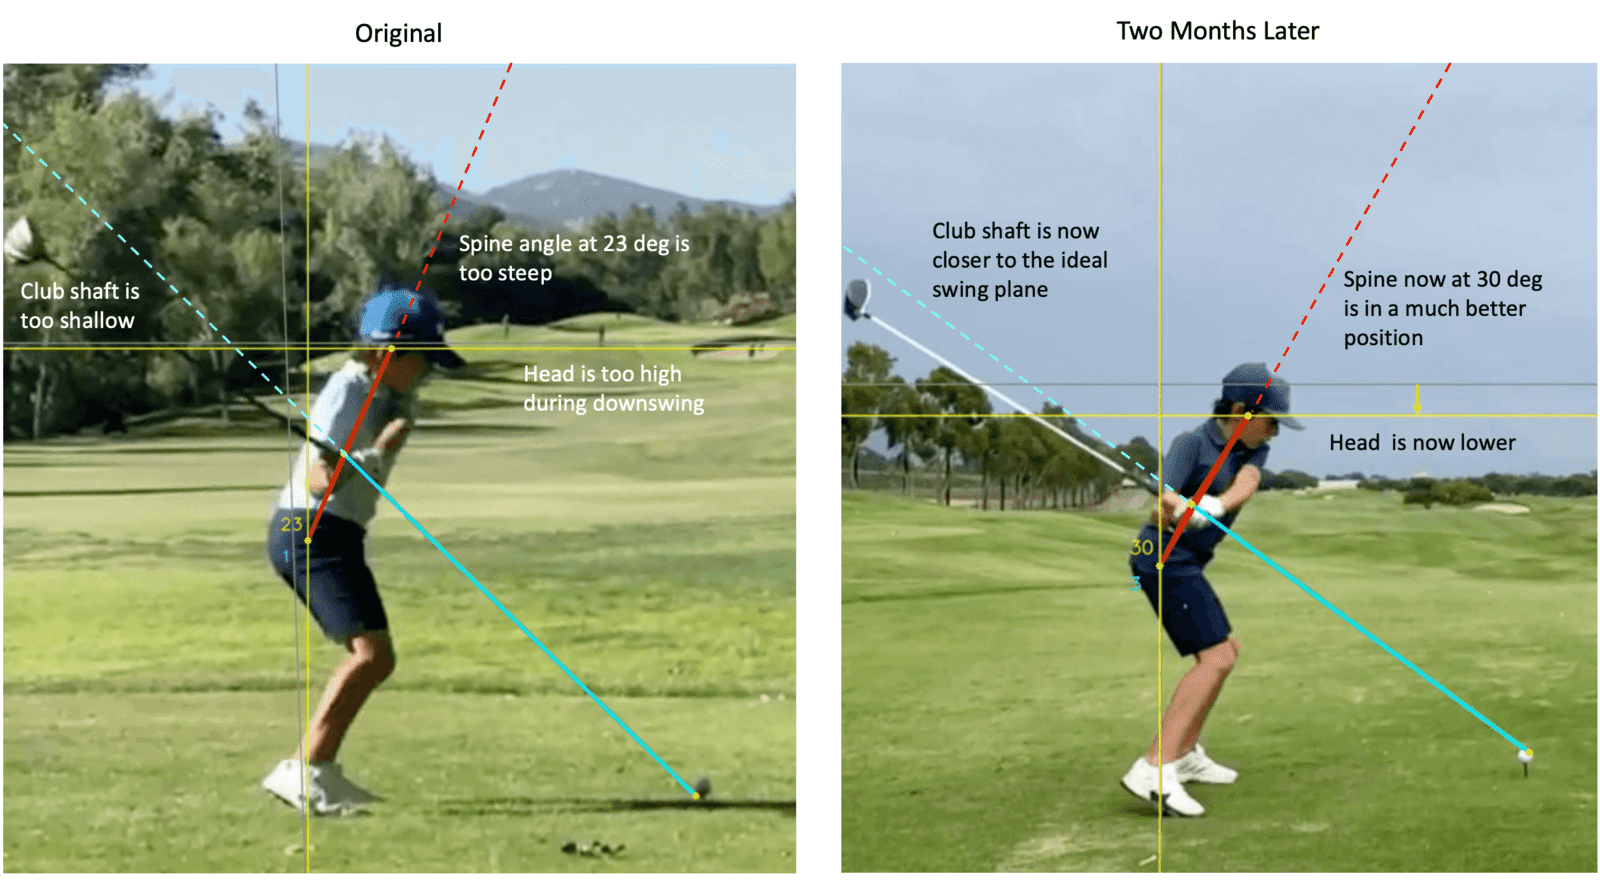

## Conclusion

As you can see the visual cues from dynamically connecting key landmark points throughout the swing can lead to immediate and informative feedback to instructors and students and can also be used to easily assess progress. Video instruction techniques are commonly used in golf instruction but the geometric relationships are typically drawn manually to identify key differences between a student's swing and a reference swing. Using computer vision techniques, we are able to automate the annotation of video frames in a way that makes instruction much more efficient and effective.